In [1]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [2]:
#CSV Path
crime_reports_path = 'C:/Users/jrams/Desktop/Crime_Report.csv'
path = os.path.realpath(crime_reports_path)

#read file into df
crime_report_df = pd.read_csv(crime_reports_path, low_memory=False)


In [3]:
def all_data_df(crime_reports_path):
    df = pd.read_csv(crime_reports_path, low_memory=False)
    return df

all_data_df = all_data_df(crime_reports_path)
all_data_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


In [10]:
#new df with only crimes and dates
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1)
#print(date_crime)

#print list containing the different types of crimes
crimes = date_crime['Highest Offense Description'].unique()
#print(crimes)

# this filters out the auto theft crimes only and by date in descending order
filtered_Auto_Theft_Crime = date_crime[date_crime['Highest Offense Description'].str.contains('Auto Theft', case=False)]
filtered_Auto_Theft_Crime_sorted = filtered_Auto_Theft_Crime.sort_values(by='Occurred Date', ascending=False)
print(filtered_Auto_Theft_Crime_sorted)


        Occurred Date Highest Offense Description
240125     12/31/2023                  AUTO THEFT
152939     12/31/2023                  AUTO THEFT
149367     12/31/2023                  AUTO THEFT
152795     12/31/2023                  AUTO THEFT
152785     12/31/2023                  AUTO THEFT
...               ...                         ...
2353631    01/01/2003                  AUTO THEFT
1440350    01/01/2003                  AUTO THEFT
593025     01/01/2003                  AUTO THEFT
1494032    01/01/2003                  AUTO THEFT
1430380    01/01/2003                  AUTO THEFT

[62451 rows x 2 columns]


In [5]:
all_theft_crimes = pd.concat([filtered_Auto_Theft_Crime], ignore_index=True)

all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

all_theft_crimes['Season'] = pd.cut(                          
    all_theft_crimes['Occurred Date'].dt.dayofyear,             
    bins= [0, 79, 171, 264, 355, 365],                         
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],       
    ordered=False                                               
    )

season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date'])

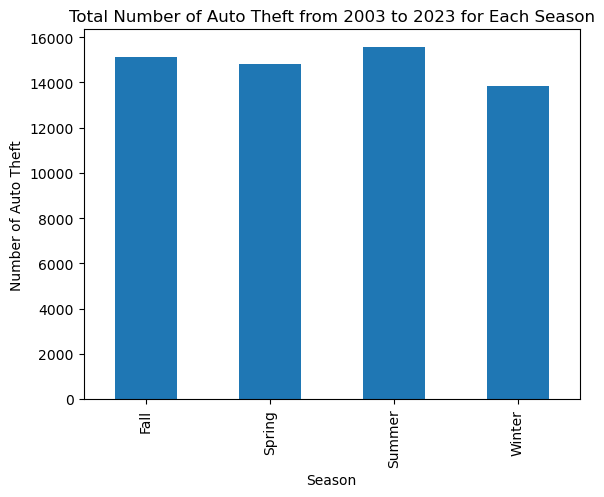

In [6]:
# Filter data for the years 2003 to 2023
filtered_years = all_theft_crimes[(all_theft_crimes['Occurred Date'].dt.year >= 2003) & (all_theft_crimes['Occurred Date'].dt.year <= 2023)]

# Group by season and count occurrences
season_counts = filtered_years.groupby('Season', observed=False).size()

# Plot the data as a bar plot
season_counts.plot(kind='bar')

# Add labels and title
plt.title('Total Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Auto Theft')

# Show the plot
plt.show()

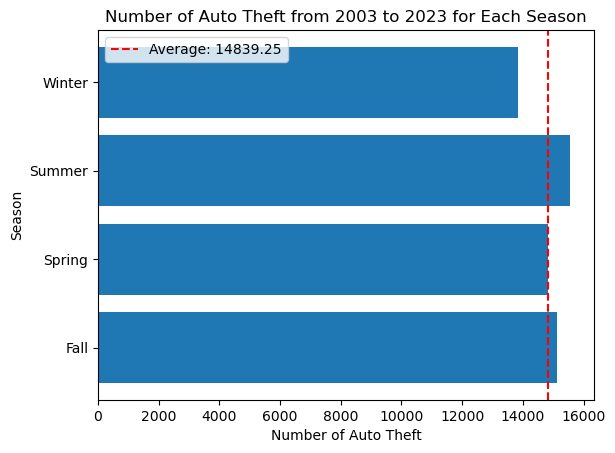

In [7]:
# Group by season and calculate the number of auto thefts per season
season_counts = filtered_years.groupby('Season', observed=False)['Occurred Date'].size()

# Calculate the average number of auto thefts per season
season_avg = season_counts.mean()

# Plot the data as a horizontal bar plot
plt.barh(season_counts.index, season_counts)

# Add a line for the average number of auto thefts
plt.axvline(x=season_avg, color='red', linestyle='--', label=f'Average: {season_avg:.2f}')

# Add labels and title
plt.title('Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Number of Auto Theft')
plt.ylabel('Season')
plt.legend()

# Show the plot
plt.show()

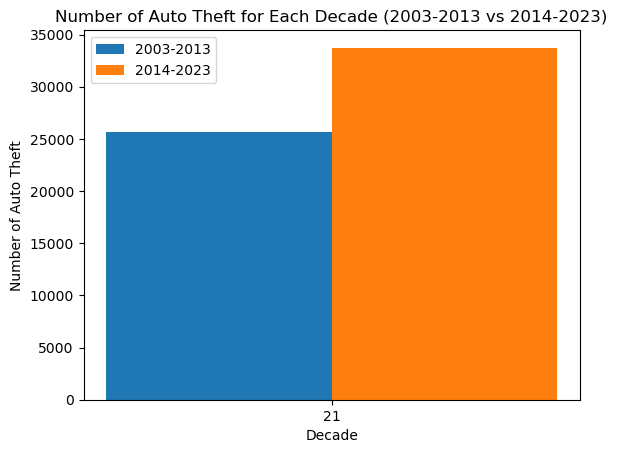

In [8]:
# Filter data for the years 2003 to 2013 and 2014 to 2023
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2003) & (filtered_years['Occurred Date'].dt.year <= 2013)].copy()
filtered_years_2014_2023 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2014) & (filtered_years['Occurred Date'].dt.year <= 2023)].copy()

# Extract century from the date for each time range
filtered_years_2003_2013.loc[:, 'Decade'] = (filtered_years_2003_2013['Occurred Date'].dt.year // 100) + 1
filtered_years_2014_2023.loc[:, 'Decade'] = (filtered_years_2014_2023['Occurred Date'].dt.year // 100) + 1

# Group by century and calculate the count of occurrences for each time range
decade_counts_2003_2013 = filtered_years_2003_2013.groupby('Decade').size()
decade_counts_2014_2023 = filtered_years_2014_2023.groupby('Decade').size()

# Plot the data as a bar plot
plt.bar(decade_counts_2003_2013.index - 0.2, decade_counts_2003_2013, width=0.4, label='2003-2013')
plt.bar(decade_counts_2014_2023.index + 0.2, decade_counts_2014_2023, width=0.4, label='2014-2023')

# Add labels and title
plt.title('Number of Auto Theft for Each Decade (2003-2013 vs 2014-2023)')
plt.xlabel('Decade')
plt.ylabel('Number of Auto Theft')
plt.xticks(decade_counts_2003_2013.index)

# Add legend
plt.legend()

# Show the plot
plt.show()